## Set up

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

from john_wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

## Acquisistion

In [3]:
df = pd.read_csv('zillowcluster_df.csv')

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


## Preperation

In [5]:
df = clean_zillow(df)

In [6]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_seperate_scale(df)

In [7]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
13853852,1.00,13.00,2.00,2.00,"1,231.00",6059,33.92,-117.97,"1,739.00",0.00,...,0.40,0.00,1.30,0.04,0.00,0.20,1.00,0,1,0
14065017,1.00,5.00,3.00,4.00,"2,615.00",6059,33.70,-118.03,"8,640.00",1.00,...,0.33,0.00,1.13,0.20,0.20,0.60,0.75,0,1,0
10854047,2.00,5.00,2.00,2.00,"1,500.00",6037,34.16,-118.48,"10,119.00",0.00,...,0.47,0.00,1.23,0.23,0.30,0.30,1.00,1,0,0
12883861,7.00,5.00,1.00,2.00,920.00,6037,34.06,-117.76,"6,886.00",0.00,...,0.60,0.00,1.26,0.16,0.20,0.10,0.50,1,0,0
10913577,2.00,1.00,3.00,2.00,"2,085.00",6037,34.15,-118.41,"31,000.00",0.00,...,0.20,0.00,1.22,0.71,0.40,0.50,1.50,1,0,0


In [8]:
train.shape

(35832, 30)

In [9]:
validate.shape

(15357, 30)

In [10]:
test.shape

(12798, 30)

In [11]:
X_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
13853852,1.00,13.00,2.00,2.00,"1,231.00",6059,33.92,-117.97,"1,739.00",0.00,...,0.40,0.00,1.30,0.04,0.00,0.20,1.00,0,1,0
14065017,1.00,5.00,3.00,4.00,"2,615.00",6059,33.70,-118.03,"8,640.00",1.00,...,0.33,0.00,1.13,0.20,0.20,0.60,0.75,0,1,0
10854047,2.00,5.00,2.00,2.00,"1,500.00",6037,34.16,-118.48,"10,119.00",0.00,...,0.47,0.00,1.23,0.23,0.30,0.30,1.00,1,0,0
12883861,7.00,5.00,1.00,2.00,920.00,6037,34.06,-117.76,"6,886.00",0.00,...,0.60,0.00,1.26,0.16,0.20,0.10,0.50,1,0,0
10913577,2.00,1.00,3.00,2.00,"2,085.00",6037,34.15,-118.41,"31,000.00",0.00,...,0.20,0.00,1.22,0.71,0.40,0.50,1.50,1,0,0


In [12]:
X_train.shape

(35832, 29)

In [13]:
y_train.shape

(35832,)

In [14]:
X_validate.shape

(15357, 29)

In [15]:
y_validate.shape

(15357,)

In [16]:
X_test.shape

(12798, 29)

In [17]:
y_test.shape

(12798,)

In [18]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.40,0.43,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.30,0.36,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.50,0.50,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.64,0.64,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.19,0.21,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00


In [19]:
train_scaled.shape

(35832, 23)

In [20]:
validate_scaled.shape

(15357, 23)

In [21]:
test_scaled.shape

(12798, 23)

# Modeling

In [22]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

## Acres + Taxamount

In [23]:
acres_tax = train_scaled

In [24]:
# assign variable we will use in our model

X = acres_tax[['acres', 'taxamount']]

In [25]:
X.head()

,acres,taxamount
0,0.04,0.03
1,0.23,0.13
2,0.27,0.05
3,0.18,0.06
4,0.84,0.11


In [26]:
X.corr()

,acres,taxamount
acres,1.00,0.14
taxamount,0.14,1.00


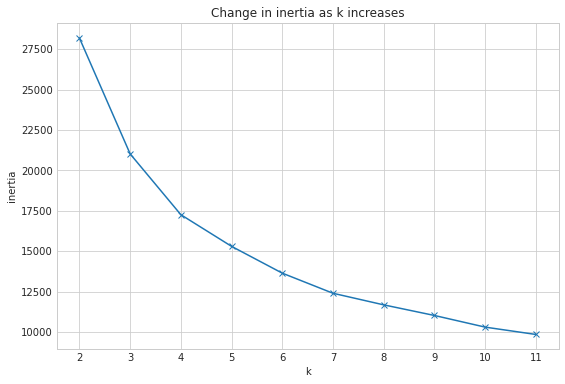

In [27]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(acres_tax).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [28]:
## it would appear the most appropriate k would be either 4 or 5 

In [29]:
kmeans = KMeans(n_clusters=4)

## make the model, n_clusters being how many clusters you want in your model 

In [30]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=4)

In [31]:
kmeans.predict(X)

## make your predictions

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [32]:
acres_tax['cluster4'] = kmeans.predict(X)

## store the predictions as a column on your df

In [33]:
acres_tax.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster4
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.43,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00,0
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.36,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00,0
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.50,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00,0
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.64,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00,0
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.21,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00,1


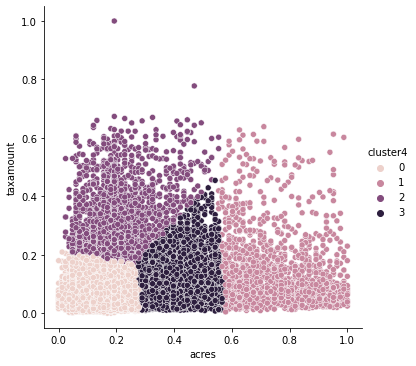

In [34]:
sns.relplot(data=acres_tax, x='acres', y='taxamount', hue='cluster4')

In [35]:
kmeans = KMeans(n_clusters=5)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

acres_tax['cluster5'] = kmeans.predict(X)

## store the predictions as a column on your df

In [36]:
acres_tax.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster4,cluster5
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00,0,4
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00,0,1
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00,0,1
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00,0,1
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00,1,2


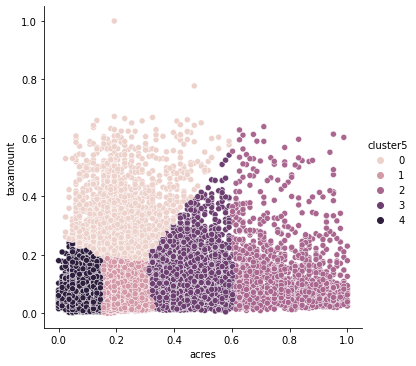

In [37]:
sns.relplot(data=acres_tax, x='acres', y='taxamount', hue='cluster5')

In [55]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster4,cluster5
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00,1,0
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00,0,4
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00,1,0
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00,2,0
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00,3,4


## Lot Size + Age

In [38]:
lot_age = train_scaled

In [39]:
# assign variable we will use in our model

X = lot_age[['lotsizesquarefeet', 'age_of_home']]

In [40]:
X.head()

,lotsizesquarefeet,age_of_home
0,0.04,0.40
1,0.23,0.30
2,0.27,0.50
3,0.18,0.64
4,0.84,0.19


In [41]:
X.corr()

,lotsizesquarefeet,age_of_home
lotsizesquarefeet,1.00,-0.10
age_of_home,-0.10,1.00


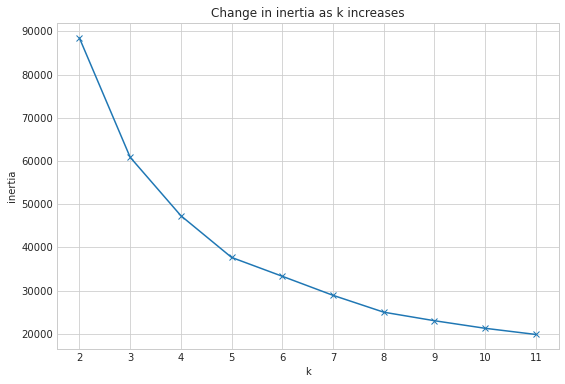

In [42]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(lot_age).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [43]:
## A good k looks like 4

In [44]:
kmeans = KMeans(n_clusters=4)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

lot_age['cluster4'] = kmeans.predict(X)

## store the predictions as a column on your df

In [54]:
lot_age.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster4,cluster5
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00,1,0
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00,0,4
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00,1,0
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00,2,0
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00,3,4


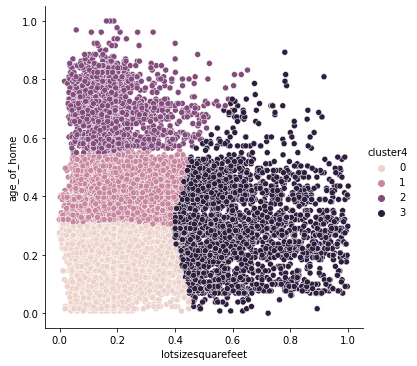

In [45]:
sns.relplot(data=lot_age, x='lotsizesquarefeet', y='age_of_home', hue='cluster4')

## Tax rate + Square Feet

In [46]:
tax_sqft = train_scaled

In [47]:
# assign variable we will use in our model

X = tax_sqft[['calculatedfinishedsquarefeet', 'taxrate']]

In [48]:
X.head()

,calculatedfinishedsquarefeet,taxrate
0,0.11,0.52
1,0.30,0.44
2,0.15,0.48
3,0.07,0.50
4,0.23,0.48


In [49]:
X.corr()

,calculatedfinishedsquarefeet,taxrate
calculatedfinishedsquarefeet,1.00,-0.11
taxrate,-0.11,1.00


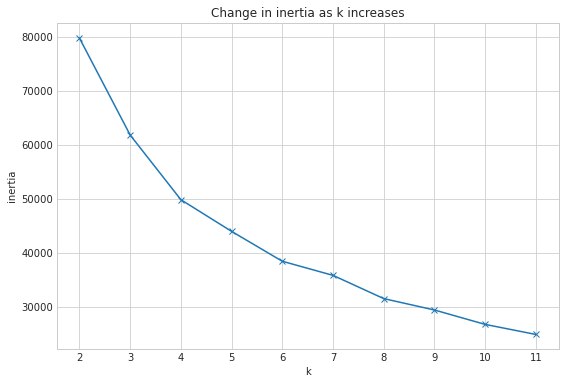

In [50]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(tax_sqft).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [51]:
## a good k looks like 5

In [52]:
kmeans = KMeans(n_clusters=5)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

tax_sqft['cluster5'] = kmeans.predict(X)

## store the predictions as a column on your df

In [53]:
tax_sqft.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster4,cluster5
0,0.00,1.00,0.12,0.12,0.11,0.41,0.79,0.04,0.00,0.38,...,0.13,0.52,0.04,0.00,0.22,0.00,1.00,0.00,1,0
1,0.00,0.33,0.25,0.38,0.30,0.26,0.75,0.23,1.00,0.62,...,0.09,0.44,0.23,0.50,0.67,0.00,1.00,0.00,0,4
2,0.04,0.33,0.12,0.12,0.15,0.59,0.52,0.27,0.00,0.00,...,0.11,0.48,0.27,0.75,0.33,1.00,0.00,0.00,1,0
3,0.26,0.33,0.00,0.12,0.07,0.51,0.89,0.18,0.00,0.00,...,0.09,0.50,0.18,0.50,0.11,1.00,0.00,0.00,2,0
4,0.04,0.00,0.25,0.12,0.23,0.58,0.55,0.84,0.00,0.00,...,0.12,0.48,0.84,1.00,0.56,1.00,0.00,0.00,3,4


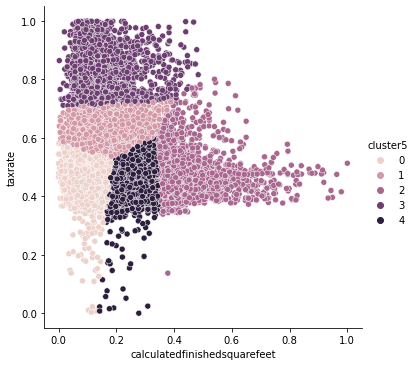

In [56]:
sns.relplot(data=tax_sqft, x='calculatedfinishedsquarefeet', y='taxrate', hue='cluster5')

## Final Model

In [ ]:
## latitude

## sq footage

## age of home 

## tax rate 

## logerror

### different model for each county?

